In [1]:
import scrapy
import requests
from scrapy.http import TextResponse

In [2]:
#프로젝트 생성

In [3]:
!scrapy startproject gq

New Scrapy project 'gq', using template directory 'c:\users\user\anaconda3\lib\site-packages\scrapy\templates\project', created in:
    C:\Code\scrapy\gq

You can start your first spider with:
    cd gq
    scrapy genspider example example.com


In [4]:
# 2. items.py 코드 작성

In [18]:
%%writefile gq/gq/items.py
# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy


class GqItem(scrapy.Item):
    title = scrapy.Field()
    date = scrapy.Field()
    contents = scrapy.Field()
    category = scrapy.Field()
    link = scrapy.Field()
    


Overwriting gq/gq/items.py


In [19]:
# 3.xpath 확인

In [46]:
for page in range(1,101)
url = "http://www.gqkorea.co.kr/category/style/page/{}".format(page)
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response.url

'http://www.gqkorea.co.kr/category/style/page/100'

In [3]:
links = response.xpath('//*[@id="posts-container"]/div[1]/article/div/div[1]/a/@href').extract()
links = list(map(lambda data:response.urljoin(data), links))
links[:3]

['http://www.gqkorea.co.kr/2020/07/28/%eb%b2%84%eb%b2%84%eb%a6%ac%ec%9d%98-2021-%ed%94%84%eb%a6%ac%ec%8a%a4%ed%94%84%eb%a7%81-%ec%84%9c%eb%a8%b8-%ec%bb%ac%eb%a0%89%ec%85%98/',
 'http://www.gqkorea.co.kr/2020/07/18/%ec%bf%a8%ed%95%98%ea%b3%a0-%eb%a9%8b%ec%a7%84-%eb%a0%88%ed%84%b0%eb%a7%81-%ec%8a%a4%ed%83%80%ec%9d%bc/',
 'http://www.gqkorea.co.kr/2020/07/16/%eb%a7%90%ea%b0%9b%ea%b3%a0-%ec%88%98%ec%a4%8d%ec%9d%80-%ec%86%8c%eb%85%84%ec%9d%98-%ec%96%bc%ea%b5%b4/']

In [4]:
    # 각 상품별 상세 페이지 URL
    def parse_page(self, response):
        links = response.xpath('//*[@id="tag_search_item"]/div/a[1]/@href').extract()
        links = list(map(lambda data:response.urljoin(data), links))
        for link in links:
            yield scrapy.Request(link, callback=self.parse_page_contents)

In [5]:
url = "http://www.gqkorea.co.kr/2020/07/18/%ec%bf%a8%ed%95%98%ea%b3%a0-%eb%a9%8b%ec%a7%84-%eb%a0%88%ed%84%b0%eb%a7%81-%ec%8a%a4%ed%83%80%ec%9d%bc/"
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response

<200 http://www.gqkorea.co.kr/2020/07/18/%EC%BF%A8%ED%95%98%EA%B3%A0-%EB%A9%8B%EC%A7%84-%EB%A0%88%ED%84%B0%EB%A7%81-%EC%8A%A4%ED%83%80%EC%9D%BC/>

In [26]:
title = response.xpath(
    '//*[@id="content"]/div[1]/article/div[1]/h2/text()').extract()
category = response.xpath(
    '//*[@id="content"]/div[1]/article/div[1]/div/div/a/text()').extract()
date = response.xpath(
    '//*[@id="content"]/div[1]/article/div[1]/div/div/span[3]/text()').extract()
contents = response.xpath(
    '//*[@id="content"]/div[1]/article/div[4]/div/p/text()').extract()
title, date, contents, category

(['쿨하고 멋진 레터링 스타일'],
 ['2020.07.18'],
 ['그래픽 프린트 베스트 5만9천원, 더그레이티스트. 스트랩 디테일 팬츠 가격 미정, 프라다. 타비 부츠 가격 미정, 메종 마르지엘라.',
  '지브라 송치 코트 1천1백90만원, 셔츠 89만원, 데님 팬츠 94만원, 홀스빗 디테일 로퍼 1백20만원, 모두 구찌.  레오퍼드 코트 5백만원, 아이스 블루 팬츠 1백30만원, 모두 구찌. 지브라 프린트 척테일러 스니커즈 8만9천원, 컨버스.',
  '모노그램 데님 재킷 가격 미정, 루이 비통. 화이트 머슬 티셔츠 가격 미정, 돌체 & 가바나. 실버 네크리스 가격 미정, 디올 맨.',
  '데님 재킷, 체크 셔츠, 레오퍼드 티셔츠, 데님 팬츠, 벨트 가격 미정, 모두 생 로랑 by 안토니 바카렐로. 카키 점프 수트 가격 미정, 펜디. 베이지 피케 셔츠 가격 미정, 돌체 & 가바나. 캐멀 스웨이드 보머 재킷 2백15만원, 구찌. 카키 데님 셔츠, 데님 팬츠 가격 미정, 모두 생 로랑 by 안토니 바카렐로. 레오퍼드 니트 톱 1백31만원, 구찌. 베이지 셔츠, 베이지 팬츠 가격 미정, 모두 돌체 & 가바나.',
  '스트라이프 베스트 48만원, 아크네 스튜디오. 보태니컬 프린트 셔츠 29만원, 맨온더분. 실버 네크리스, 뱅글 가격 미정, 모두 생 로랑 by 안토니 바카렐로.',
  '그래픽 프린트 머슬 티셔츠 1만7천9백원, H&M. 데님 팬츠 94만원, 구찌. 파이톤 벨트, 체인 브레이슬릿 가격 미정, 모두 생 로랑 by 안토니 바카렐로. 체인 네크리스 가격 미정, 발렌시아가.',
  '프린트 셔츠 24만원, 벨벳 벨보텀 팬츠 22만원, 모두 더그레이티스트. 블랙 로퍼 가격 미정, 생 로랑 by 안토니 바카렐로. 그레이 베스트, 프린트 슬리브리스 셔츠, 블랙 팬츠 가격 미정, 모두 프라다. 부츠 1백90만원, 에르메네질도 제냐.',
  '레터링 화이트 티셔츠 51만5천원, 에르메네질도 제냐. 데님 팬츠 1백20만원, 로고 벨트 63만원, 모두 구찌.

In [53]:
%%writefile gq/gq/spiders/spider.py
import scrapy
import requests
from scrapy.http import TextResponse
from gq.items import GqItem

class GqSpider(scrapy.Spider):
    name = "Gq"
    allow_domain = ["http://www.gqkorea.co.kr/"]
    start_urls = ["http://www.gqkorea.co.kr/category/style/"]
    
    def parse(self, response):
        for page in range(1,101):
            url = "http://www.gqkorea.co.kr/category/style/page/{}".format(page)
            req = requests.get(url)
            response = TextResponse(req.url, body=req.text, encoding="utf-8")
        
            links = response.xpath('//*[@id="posts-container"]/div[1]/article/div/div[1]/a/@href').extract()
            links = list(map(lambda data:response.urljoin(data), links))
            for link in links:
                yield scrapy.Request(link, callback=self.parse_content)
            
    def parse_content(self, response):
        item = GqItem()
        item["title"] = response.xpath('//*[@id="content"]/div[1]/article/div[1]/h2/text()').extract()
        item["category"] = response.xpath('//*[@id="content"]/div[1]/article/div[1]/div/div/a/text()').extract()
        item["date"] = response.xpath('//*[@id="content"]/div[1]/article/div[1]/div/div/span[3]/text()').extract()
        item["contents"] = response.xpath('//*[@id="content"]/div[1]/article/div[4]/div/p/text()').extract()
        item["link"] = response.url
        yield item

Overwriting gq/gq/spiders/spider.py


In [48]:
%%writefile run.sh
cd gq
scrapy crawl Gq -o gq.csv

Overwriting run.sh


In [48]:
df = pd.read_csv("gq/gq.csv")
df

,category,contents,date,link,title
0,news,NaN,2020.07.28,http://www.gqkorea.co.kr/2020/07/28/%eb%b2%84%...,버버리의 2021 프리스프링/서머 컬렉션
1,pictorial,"타이다이 데님 재킷, 코튼 햇, 모두 MSGM. 블루 팬츠, 로빈 린치.,파스텔 빈...",2020.06.14,http://www.gqkorea.co.kr/2020/06/14/%eb%82%af%...,낯선 곳의 공기
2,pictorial,"인어공주 프린트 데님 팬츠 가격 미정, 로에베 폴라이비자 컬렉션. 진주 네크리스 4...",2020.06.07,http://www.gqkorea.co.kr/2020/06/07/%ec%97%ac%...,여름 휴가를 위한 스타일링
3,pictorial,"패치워크 디테일 셔츠 76만원, 세브시 at 지.스트리트 494 옴므. 블랙 쇼츠 ...",2020.06.06,http://www.gqkorea.co.kr/2020/06/06/%ec%8a%a4%...,스포츠웨어 힙하게 입는 방법
4,trend,"Lil Nas X,Spike Lee,Snoop Dogg,Lil Jon,Justin ...",2020.05.24,http://www.gqkorea.co.kr/2020/05/24/%ec%8a%a4%...,스웨트 수트를 입는 방법
...,...,...,...,...,...
1995,item,NaN,2020.05.15,http://www.gqkorea.co.kr/2020/05/15/%ec%97%90%...,"에르메스, 2020 SPRING/SUMMER SHOES"
1996,news,NaN,2020.07.11,http://www.gqkorea.co.kr/2020/07/11/%eb%b0%80%...,밀라노 디지털 패션위크 개봉박두
1997,pictorial,"페이즐리 셔츠 41만원, 에트로. 베이지 팬츠 가격 미정, 프라다. 체인 네크리스 ...",2020.07.12,http://www.gqkorea.co.kr/2020/07/12/%ed%8c%8c%...,파도와 바다를 위한 스타일링
1998,pictorial,"벨티드 더블 브레스티드 재킷, 팬츠, 옥스퍼드 셔츠, 실크 타이, 모두 버버리.,체...",2020.07.16,http://www.gqkorea.co.kr/2020/07/16/%eb%a7%90%...,말갛고 수줍은 소년의 얼굴


In [49]:
df2=df.dropna()
df2

,category,contents,date,link,title
1,pictorial,"타이다이 데님 재킷, 코튼 햇, 모두 MSGM. 블루 팬츠, 로빈 린치.,파스텔 빈...",2020.06.14,http://www.gqkorea.co.kr/2020/06/14/%eb%82%af%...,낯선 곳의 공기
2,pictorial,"인어공주 프린트 데님 팬츠 가격 미정, 로에베 폴라이비자 컬렉션. 진주 네크리스 4...",2020.06.07,http://www.gqkorea.co.kr/2020/06/07/%ec%97%ac%...,여름 휴가를 위한 스타일링
3,pictorial,"패치워크 디테일 셔츠 76만원, 세브시 at 지.스트리트 494 옴므. 블랙 쇼츠 ...",2020.06.06,http://www.gqkorea.co.kr/2020/06/06/%ec%8a%a4%...,스포츠웨어 힙하게 입는 방법
4,trend,"Lil Nas X,Spike Lee,Snoop Dogg,Lil Jon,Justin ...",2020.05.24,http://www.gqkorea.co.kr/2020/05/24/%ec%8a%a4%...,스웨트 수트를 입는 방법
5,pictorial,"플라워 프린트 후드 3백47만원, 루이 비통. 네이비 버킷 햇 가격 미정, C.P....",2020.06.04,http://www.gqkorea.co.kr/2020/06/04/%ec%96%b4%...,어디든 갈 수 있는 세계
...,...,...,...,...,...
1993,pictorial,"그레이 브라운 수트 재킷 4백20만원, 팬츠 1백30만원, 베스트 1백59만원, 스...",2020.05.11,http://www.gqkorea.co.kr/2020/05/11/%eb%b3%b4%...,보기만 해도 웃음이 나오는 패션
1994,pictorial,"레드 재킷과 화이트 슬리브리스 셔츠 가격 미정, 모두 프라다. 화이트 코튼 쇼츠 8...",2020.07.15,http://www.gqkorea.co.kr/2020/07/15/%ec%9d%b4%...,이케아에서 사고싶은 것들을 골랐다
1997,pictorial,"페이즐리 셔츠 41만원, 에트로. 베이지 팬츠 가격 미정, 프라다. 체인 네크리스 ...",2020.07.12,http://www.gqkorea.co.kr/2020/07/12/%ed%8c%8c%...,파도와 바다를 위한 스타일링
1998,pictorial,"벨티드 더블 브레스티드 재킷, 팬츠, 옥스퍼드 셔츠, 실크 타이, 모두 버버리.,체...",2020.07.16,http://www.gqkorea.co.kr/2020/07/16/%eb%a7%90%...,말갛고 수줍은 소년의 얼굴


In [50]:
df2['date']

1       2020.06.14
2       2020.06.07
3       2020.06.06
4       2020.05.24
5       2020.06.04
           ...    
1993    2020.05.11
1994    2020.07.15
1997    2020.07.12
1998    2020.07.16
1999    2020.07.18
Name: date, Length: 860, dtype: object

In [51]:
df2['Datetime'] = pd.to_datetime(df2['date'])
df2

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,contents,date,link,title,Datetime
1,pictorial,"타이다이 데님 재킷, 코튼 햇, 모두 MSGM. 블루 팬츠, 로빈 린치.,파스텔 빈...",2020.06.14,http://www.gqkorea.co.kr/2020/06/14/%eb%82%af%...,낯선 곳의 공기,2020-06-14
2,pictorial,"인어공주 프린트 데님 팬츠 가격 미정, 로에베 폴라이비자 컬렉션. 진주 네크리스 4...",2020.06.07,http://www.gqkorea.co.kr/2020/06/07/%ec%97%ac%...,여름 휴가를 위한 스타일링,2020-06-07
3,pictorial,"패치워크 디테일 셔츠 76만원, 세브시 at 지.스트리트 494 옴므. 블랙 쇼츠 ...",2020.06.06,http://www.gqkorea.co.kr/2020/06/06/%ec%8a%a4%...,스포츠웨어 힙하게 입는 방법,2020-06-06
4,trend,"Lil Nas X,Spike Lee,Snoop Dogg,Lil Jon,Justin ...",2020.05.24,http://www.gqkorea.co.kr/2020/05/24/%ec%8a%a4%...,스웨트 수트를 입는 방법,2020-05-24
5,pictorial,"플라워 프린트 후드 3백47만원, 루이 비통. 네이비 버킷 햇 가격 미정, C.P....",2020.06.04,http://www.gqkorea.co.kr/2020/06/04/%ec%96%b4%...,어디든 갈 수 있는 세계,2020-06-04
...,...,...,...,...,...,...
1993,pictorial,"그레이 브라운 수트 재킷 4백20만원, 팬츠 1백30만원, 베스트 1백59만원, 스...",2020.05.11,http://www.gqkorea.co.kr/2020/05/11/%eb%b3%b4%...,보기만 해도 웃음이 나오는 패션,2020-05-11
1994,pictorial,"레드 재킷과 화이트 슬리브리스 셔츠 가격 미정, 모두 프라다. 화이트 코튼 쇼츠 8...",2020.07.15,http://www.gqkorea.co.kr/2020/07/15/%ec%9d%b4%...,이케아에서 사고싶은 것들을 골랐다,2020-07-15
1997,pictorial,"페이즐리 셔츠 41만원, 에트로. 베이지 팬츠 가격 미정, 프라다. 체인 네크리스 ...",2020.07.12,http://www.gqkorea.co.kr/2020/07/12/%ed%8c%8c%...,파도와 바다를 위한 스타일링,2020-07-12
1998,pictorial,"벨티드 더블 브레스티드 재킷, 팬츠, 옥스퍼드 셔츠, 실크 타이, 모두 버버리.,체...",2020.07.16,http://www.gqkorea.co.kr/2020/07/16/%eb%a7%90%...,말갛고 수줍은 소년의 얼굴,2020-07-16


In [52]:
df2['year'] = df2['Datetime'].dt.year
df2['month'] = df2['Datetime'].dt.month
df2['day'] = df2['Datetime'].dt.day

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [53]:
df2

,category,contents,date,link,title,Datetime,year,month,day
1,pictorial,"타이다이 데님 재킷, 코튼 햇, 모두 MSGM. 블루 팬츠, 로빈 린치.,파스텔 빈...",2020.06.14,http://www.gqkorea.co.kr/2020/06/14/%eb%82%af%...,낯선 곳의 공기,2020-06-14,2020,6,14
2,pictorial,"인어공주 프린트 데님 팬츠 가격 미정, 로에베 폴라이비자 컬렉션. 진주 네크리스 4...",2020.06.07,http://www.gqkorea.co.kr/2020/06/07/%ec%97%ac%...,여름 휴가를 위한 스타일링,2020-06-07,2020,6,7
3,pictorial,"패치워크 디테일 셔츠 76만원, 세브시 at 지.스트리트 494 옴므. 블랙 쇼츠 ...",2020.06.06,http://www.gqkorea.co.kr/2020/06/06/%ec%8a%a4%...,스포츠웨어 힙하게 입는 방법,2020-06-06,2020,6,6
4,trend,"Lil Nas X,Spike Lee,Snoop Dogg,Lil Jon,Justin ...",2020.05.24,http://www.gqkorea.co.kr/2020/05/24/%ec%8a%a4%...,스웨트 수트를 입는 방법,2020-05-24,2020,5,24
5,pictorial,"플라워 프린트 후드 3백47만원, 루이 비통. 네이비 버킷 햇 가격 미정, C.P....",2020.06.04,http://www.gqkorea.co.kr/2020/06/04/%ec%96%b4%...,어디든 갈 수 있는 세계,2020-06-04,2020,6,4
...,...,...,...,...,...,...,...,...,...
1993,pictorial,"그레이 브라운 수트 재킷 4백20만원, 팬츠 1백30만원, 베스트 1백59만원, 스...",2020.05.11,http://www.gqkorea.co.kr/2020/05/11/%eb%b3%b4%...,보기만 해도 웃음이 나오는 패션,2020-05-11,2020,5,11
1994,pictorial,"레드 재킷과 화이트 슬리브리스 셔츠 가격 미정, 모두 프라다. 화이트 코튼 쇼츠 8...",2020.07.15,http://www.gqkorea.co.kr/2020/07/15/%ec%9d%b4%...,이케아에서 사고싶은 것들을 골랐다,2020-07-15,2020,7,15
1997,pictorial,"페이즐리 셔츠 41만원, 에트로. 베이지 팬츠 가격 미정, 프라다. 체인 네크리스 ...",2020.07.12,http://www.gqkorea.co.kr/2020/07/12/%ed%8c%8c%...,파도와 바다를 위한 스타일링,2020-07-12,2020,7,12
1998,pictorial,"벨티드 더블 브레스티드 재킷, 팬츠, 옥스퍼드 셔츠, 실크 타이, 모두 버버리.,체...",2020.07.16,http://www.gqkorea.co.kr/2020/07/16/%eb%a7%90%...,말갛고 수줍은 소년의 얼굴,2020-07-16,2020,7,16


In [54]:
df3=df2['contents']

In [30]:
# 형태소 분류
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer

#### 한글자 제외한 단어 분류함수

In [31]:
tagger=Twitter()

In [32]:
#한글자 제외한 단어 분류함수
def get_word(doc):
    nouns=tagger.nouns(doc)
    return [noun for noun in nouns if len(noun)>1]

In [33]:
cv=CountVectorizer(tokenizer=get_word,max_features=200)
df3_word=cv.fit_transform(df3)
df3_word_word=cv.get_feature_names()

In [34]:
df3_word_word[:10]

['가격', '가모', '가바', '가죽', '갈색', '검은색', '검정', '검정색', '골드', '구두']

#### 단어별 출현 빈도

In [35]:
count_mat=df3_word.sum(axis=0)
count_mat

matrix([[5000,   73,  104, 1052,  105,   84,  104,  190,  213,  108,
          524,   67,  209,   84,  157,   79,   78,  211,  168,  183,
           66,  754,   59,  197,   68,  760,  104,  204,  115,  100,
          275,  137,  170,   79,  196,   67,  225,  260,  277,   87,
          213,  406,   81,   66,  264,  118,   63,   92,  147,  119,
         3759,   74,  182,  382,   73,  268, 4995,  253,   74,  105,
          254,   86,  239,  138,  100,  111,   74,  126,  237,  115,
           63,  134,  678,   75,  644,  143,   92,   93,   60,  944,
          506,  100,  400,  164,   72,  127,   86,  132,  399,   68,
         2322,  164,   74,  452,   78,  571,  375,  506,  141,  186,
          253,  205,  108,  138,   68,  422,   67,  171,   74,   98,
           95,  137,  110,  168,  422,   64,   72,   99,   63,  174,
          256,  111,  323,   75,  260,  159,  210,   85,  194,   71,
          300,  187,  211,   85,  177,  117,  111,  364, 1495,   60,
          221,   66,  243,  156,  

In [36]:
count=np.squeeze(np.asarray(count_mat))
word_count=list(zip(df3_word_word,count))

In [37]:
word_count

[('가격', 5000),
 ('가모', 73),
 ('가바', 104),
 ('가죽', 1052),
 ('갈색', 105),
 ('검은색', 84),
 ('검정', 104),
 ('검정색', 190),
 ('골드', 213),
 ('구두', 108),
 ('구찌', 524),
 ('귀고리', 67),
 ('그레이', 209),
 ('그린', 84),
 ('김서룡', 157),
 ('나이키', 79),
 ('나일론', 78),
 ('남색', 211),
 ('네이비', 168),
 ('네타', 183),
 ('노튼', 66),
 ('니트', 754),
 ('다운', 59),
 ('더블', 197),
 ('더비', 68),
 ('데님', 760),
 ('돌체', 104),
 ('디올', 204),
 ('디테일', 115),
 ('라벨', 100),
 ('랄프', 275),
 ('레더', 137),
 ('레드', 170),
 ('레이', 79),
 ('레이스', 196),
 ('레터', 67),
 ('로고', 225),
 ('로랑', 260),
 ('로렌', 277),
 ('로이', 87),
 ('로퍼', 213),
 ('루이', 406),
 ('리넨', 81),
 ('리바이스', 66),
 ('리스', 264),
 ('리스트', 118),
 ('마켓', 63),
 ('맥퀸', 92),
 ('머플러', 147),
 ('모델', 119),
 ('모두', 3759),
 ('모양', 74),
 ('모자', 182),
 ('목걸이', 382),
 ('몽클레르', 73),
 ('무늬', 268),
 ('미정', 4995),
 ('바카렐', 253),
 ('바토', 74),
 ('반지', 105),
 ('발렌시아', 254),
 ('발렌티노', 86),
 ('백만원', 239),
 ('백원', 138),
 ('밴드', 100),
 ('버버리', 111),
 ('버클', 74),
 ('베르사체', 126),
 ('베스트', 237),
 ('베이지', 115),
 ('벨루', 6

#### 빈도 정렬

In [38]:
word_count = sorted(word_count, key=lambda t:t[1],reverse=True)

In [39]:
word_count[:50]

[('가격', 5000),
 ('미정', 4995),
 ('모두', 3759),
 ('팬츠', 2908),
 ('셔츠', 2322),
 ('재킷', 1495),
 ('가죽', 1052),
 ('블랙', 944),
 ('코트', 849),
 ('화이트', 843),
 ('데님', 760),
 ('니트', 754),
 ('티셔츠', 687),
 ('벨트', 678),
 ('부츠', 644),
 ('수트', 571),
 ('구찌', 524),
 ('터틀넥', 518),
 ('블루', 506),
 ('스니커즈', 506),
 ('타이', 486),
 ('쇼츠', 452),
 ('스트라이프', 422),
 ('실크', 422),
 ('루이', 406),
 ('체크', 402),
 ('비통', 400),
 ('선글라스', 399),
 ('목걸이', 382),
 ('슈즈', 375),
 ('장식', 364),
 ('양말', 323),
 ('옴므', 300),
 ('프라다', 295),
 ('프린트', 284),
 ('회색', 281),
 ('로렌', 277),
 ('랄프', 275),
 ('무늬', 268),
 ('리스', 264),
 ('로랑', 260),
 ('에디터', 260),
 ('안토니', 256),
 ('발렌시아', 254),
 ('바카렐', 253),
 ('스웨터', 253),
 ('줄무늬', 243),
 ('백만원', 239),
 ('베스트', 237),
 ('패턴', 234)]

In [40]:
word_count_1=[]
for item in word_count:
    if item[1]>100 and item[1] <= 1052 :
        word_count_1.append(item)

In [41]:
from wordcloud import WordCloud

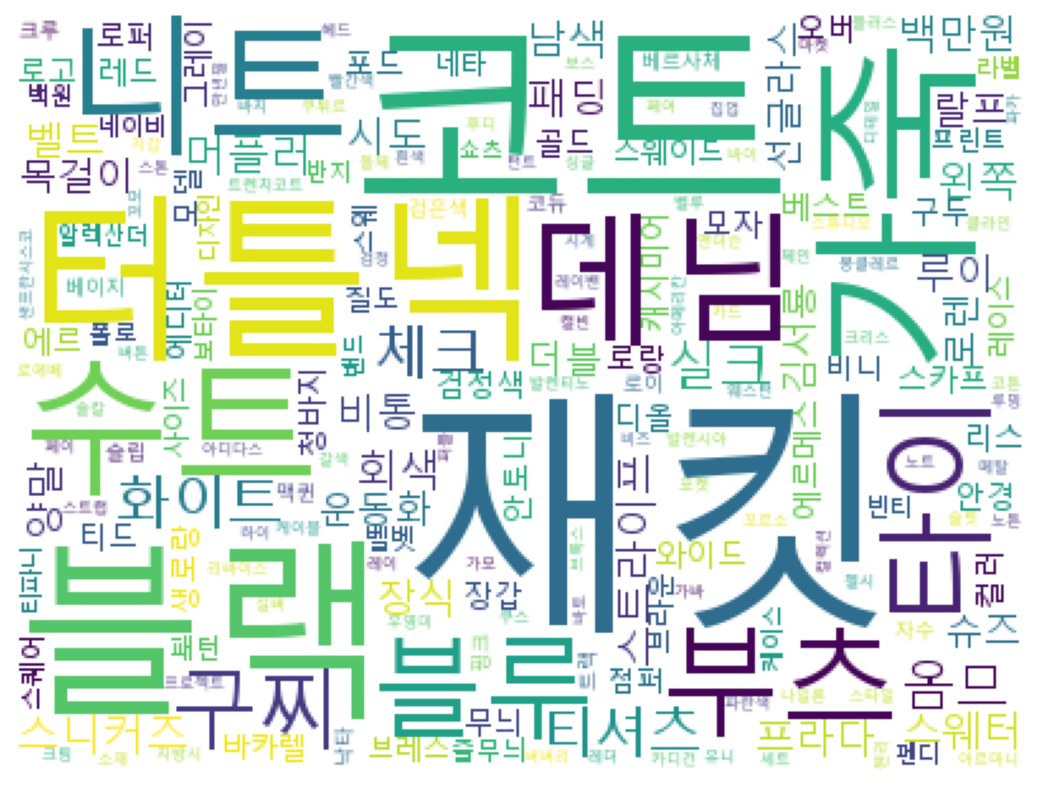

In [129]:
wc=WordCloud(font_path='c://Windows//Fonts/malgun.ttf',background_color='white',width=400,height=300)
cloud=wc.generate_from_frequencies(dict(word_count_1))
plt.figure(figsize=(10,7))
plt.imshow(cloud)
plt.axis('off')
plt.show()

- 12월, 1월 워드클라우드

In [55]:
df2["month"]

1       6
2       6
3       6
4       5
5       6
       ..
1993    5
1994    7
1997    7
1998    7
1999    7
Name: month, Length: 860, dtype: int64

In [56]:
m1=df2.loc[(df2["month"] == 12) | (df2["month"] == 1) ]
m2=df2.loc[(df2["month"] == 3) | (df2["month"] == 4) ]
m3=df2.loc[(df2["month"] == 7) | (df2["month"] == 8) ]
m4=df2.loc[(df2["month"] == 9) | (df2["month"] == 10) ]

In [60]:
mk1=m1['contents']
mk2=m2['contents']
mk3=m3['contents']
mk4=m4['contents']

In [61]:
cv=CountVectorizer(tokenizer=get_word,max_features=200)
mk1_word=cv.fit_transform(mk1)
mk1_word_word=cv.get_feature_names()

In [62]:
cv=CountVectorizer(tokenizer=get_word,max_features=200)
mk2_word=cv.fit_transform(mk2)
mk2_word_word=cv.get_feature_names()

In [63]:
cv=CountVectorizer(tokenizer=get_word,max_features=200)
mk3_word=cv.fit_transform(mk3)
mk3_word_word=cv.get_feature_names()

In [64]:
cv=CountVectorizer(tokenizer=get_word,max_features=200)
mk4_word=cv.fit_transform(mk4)
mk4_word_word=cv.get_feature_names()

In [65]:
mk1_word_word[:10]
mk2_word_word[:10]
mk3_word_word[:10]
mk4_word_word[:10]

['가격', '가모', '가바', '가죽', '갈색', '검정', '검정색', '골드', '구두', '구찌']

In [66]:
count_mat1=mk1_word.sum(axis=0)
count_mat2=mk2_word.sum(axis=0)
count_mat3=mk3_word.sum(axis=0)
count_mat4=mk4_word.sum(axis=0)

In [67]:
count1=np.squeeze(np.asarray(count_mat1))
word_count1=list(zip(mk1_word_word,count1))

In [68]:
count2=np.squeeze(np.asarray(count_mat2))
word_count2=list(zip(mk2_word_word,count2))

In [69]:
count3=np.squeeze(np.asarray(count_mat3))
word_count3=list(zip(mk3_word_word,count3))

In [70]:
count4=np.squeeze(np.asarray(count_mat4))
word_count4=list(zip(mk4_word_word,count4))

In [71]:
word_count1 = sorted(word_count1, key=lambda t:t[1],reverse=True)
word_count2 = sorted(word_count2, key=lambda t:t[1],reverse=True)
word_count3 = sorted(word_count3, key=lambda t:t[1],reverse=True)
word_count4 = sorted(word_count4, key=lambda t:t[1],reverse=True)

In [73]:
word_count1[:50]  #12월 1월

[('가격', 851),
 ('미정', 851),
 ('모두', 609),
 ('팬츠', 448),
 ('셔츠', 367),
 ('재킷', 296),
 ('코트', 233),
 ('블랙', 158),
 ('터틀넥', 137),
 ('가죽', 129),
 ('수트', 124),
 ('니트', 123),
 ('데님', 115),
 ('부츠', 109),
 ('타이', 107),
 ('블루', 92),
 ('구찌', 91),
 ('화이트', 83),
 ('체크', 81),
 ('실크', 77),
 ('티셔츠', 77),
 ('옴므', 74),
 ('스니커즈', 73),
 ('머플러', 72),
 ('회색', 72),
 ('스트라이프', 71),
 ('스웨터', 64),
 ('루이', 62),
 ('비통', 62),
 ('벨트', 61),
 ('장식', 60),
 ('프라다', 60),
 ('왼쪽', 57),
 ('남색', 56),
 ('양말', 56),
 ('시도', 54),
 ('백만원', 52),
 ('패딩', 52),
 ('더블', 47),
 ('목걸이', 47),
 ('운동화', 46),
 ('선글라스', 45),
 ('로렌', 44),
 ('랄프', 43),
 ('슈즈', 42),
 ('김서룡', 41),
 ('베스트', 41),
 ('디올', 40),
 ('로퍼', 40),
 ('스카프', 39)]

In [74]:
word_count2[:50] # 3월 4월

[('가격', 1010),
 ('미정', 1009),
 ('모두', 895),
 ('팬츠', 659),
 ('셔츠', 531),
 ('재킷', 393),
 ('가죽', 223),
 ('화이트', 197),
 ('블랙', 181),
 ('데님', 177),
 ('벨트', 150),
 ('티셔츠', 147),
 ('니트', 138),
 ('블루', 132),
 ('스니커즈', 125),
 ('실크', 118),
 ('타이', 117),
 ('구찌', 102),
 ('목걸이', 98),
 ('스트라이프', 95),
 ('루이', 94),
 ('부츠', 94),
 ('비통', 93),
 ('슈즈', 93),
 ('코트', 89),
 ('수트', 86),
 ('장식', 77),
 ('리스', 76),
 ('쇼츠', 76),
 ('선글라스', 74),
 ('프라다', 73),
 ('골드', 69),
 ('체크', 69),
 ('발렌시아', 68),
 ('옴므', 68),
 ('로랑', 65),
 ('바카렐', 64),
 ('안토니', 64),
 ('소재', 60),
 ('베스트', 58),
 ('슬리브', 58),
 ('랄프', 57),
 ('로렌', 57),
 ('양말', 57),
 ('디올', 56),
 ('무늬', 53),
 ('지방시', 53),
 ('패턴', 52),
 ('와이드', 51),
 ('폴로', 51)]

In [75]:
word_count3[:50] #7월 8월

[('가격', 806),
 ('미정', 805),
 ('모두', 517),
 ('팬츠', 391),
 ('셔츠', 292),
 ('가죽', 211),
 ('재킷', 156),
 ('화이트', 145),
 ('블랙', 141),
 ('벨트', 122),
 ('니트', 103),
 ('데님', 88),
 ('쇼츠', 88),
 ('코트', 82),
 ('티셔츠', 82),
 ('구찌', 80),
 ('부츠', 80),
 ('터틀넥', 73),
 ('루이', 71),
 ('선글라스', 69),
 ('수트', 69),
 ('비통', 68),
 ('지갑', 64),
 ('수영복', 63),
 ('스니커즈', 63),
 ('블루', 59),
 ('목걸이', 58),
 ('줄무늬', 56),
 ('발렌시아', 51),
 ('실크', 51),
 ('크리스', 50),
 ('무늬', 49),
 ('에디터', 48),
 ('프린트', 48),
 ('스트라이프', 47),
 ('장식', 47),
 ('체크', 47),
 ('에르메스', 43),
 ('프라다', 43),
 ('로랑', 42),
 ('바카렐', 42),
 ('안토니', 42),
 ('팔찌', 42),
 ('슈즈', 41),
 ('로고', 40),
 ('랄프', 39),
 ('로렌', 39),
 ('왼쪽', 38),
 ('타이', 37),
 ('남색', 35)]

In [76]:
word_count4[:50] #9월 10월 

[('가격', 690),
 ('미정', 688),
 ('모두', 631),
 ('팬츠', 521),
 ('셔츠', 333),
 ('재킷', 243),
 ('코트', 209),
 ('니트', 186),
 ('가죽', 181),
 ('부츠', 168),
 ('벨트', 138),
 ('블랙', 133),
 ('터틀넥', 131),
 ('데님', 110),
 ('타이', 102),
 ('티셔츠', 98),
 ('체크', 88),
 ('수트', 83),
 ('스니커즈', 82),
 ('화이트', 82),
 ('랄프', 76),
 ('로렌', 76),
 ('선글라스', 76),
 ('양말', 73),
 ('구찌', 69),
 ('슈즈', 69),
 ('스웨터', 67),
 ('베스트', 66),
 ('장식', 66),
 ('스트라이프', 65),
 ('블루', 64),
 ('회색', 62),
 ('캐시미어', 60),
 ('그레이', 55),
 ('폴로', 51),
 ('루이', 49),
 ('비통', 49),
 ('패턴', 48),
 ('실크', 47),
 ('프린트', 47),
 ('목걸이', 45),
 ('점퍼', 45),
 ('스카프', 43),
 ('에디터', 43),
 ('검정색', 42),
 ('무늬', 42),
 ('소재', 41),
 ('스웨이드', 40),
 ('로퍼', 39),
 ('레이스', 37)]

In [86]:
word_count_1=[]
for item in word_count1:
    if item[1]>1 and item[1] <= 296 :
        word_count_1.append(item)

In [87]:
word_count_2=[]
for item in word_count2:
    if item[1]>1 and item[1] <= 393 :
        word_count_2.append(item)

In [88]:
word_count_3=[]
for item in word_count3:
    if item[1]>1 and item[1] <= 211 :
        word_count_3.append(item)

In [89]:
word_count_4=[]
for item in word_count4:
    if item[1]>1 and item[1] <= 243 :
        word_count_4.append(item)

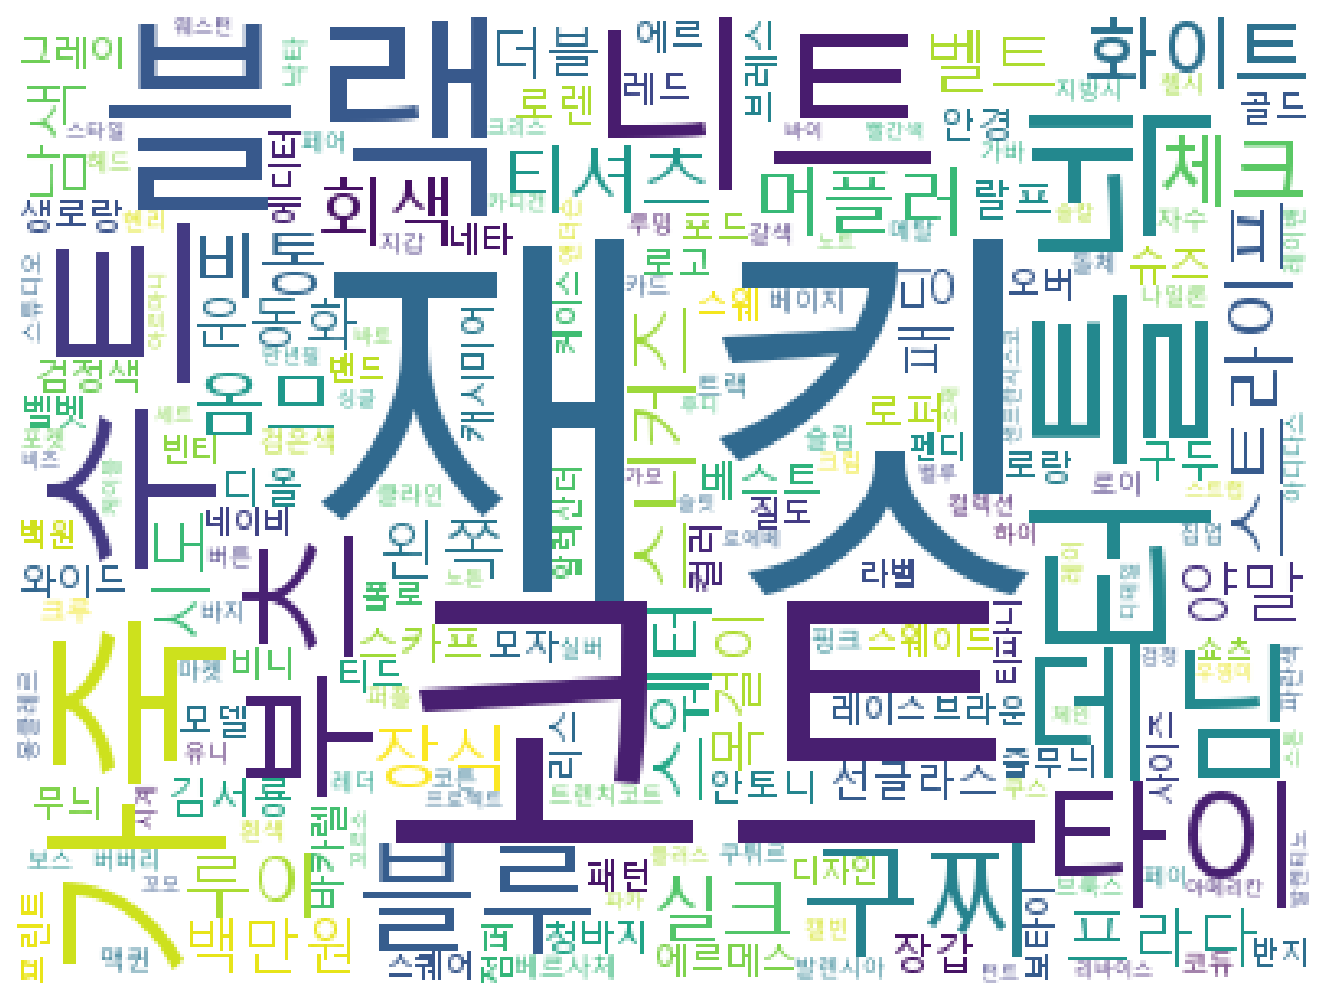

In [90]:
#12월 1월
wc=WordCloud(font_path='c://Windows//Fonts/malgun.ttf',background_color='white',width=400,height=300)
cloud=wc.generate_from_frequencies(dict(word_count_1))
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

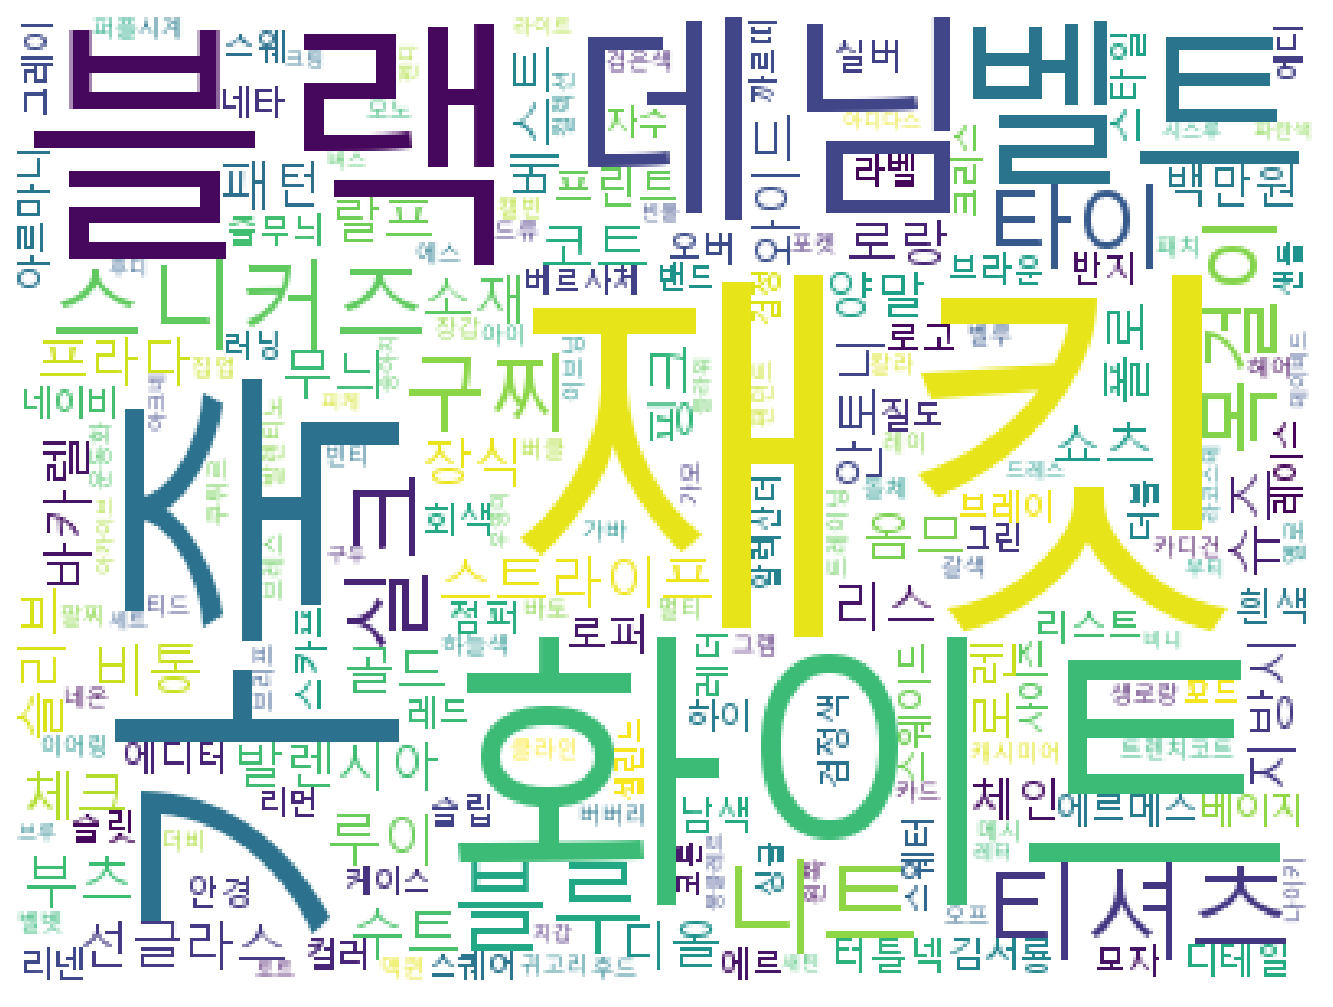

In [91]:
# 3월 4월
wc=WordCloud(font_path='c://Windows//Fonts/malgun.ttf',background_color='white',width=400,height=300)
cloud=wc.generate_from_frequencies(dict(word_count_2))
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

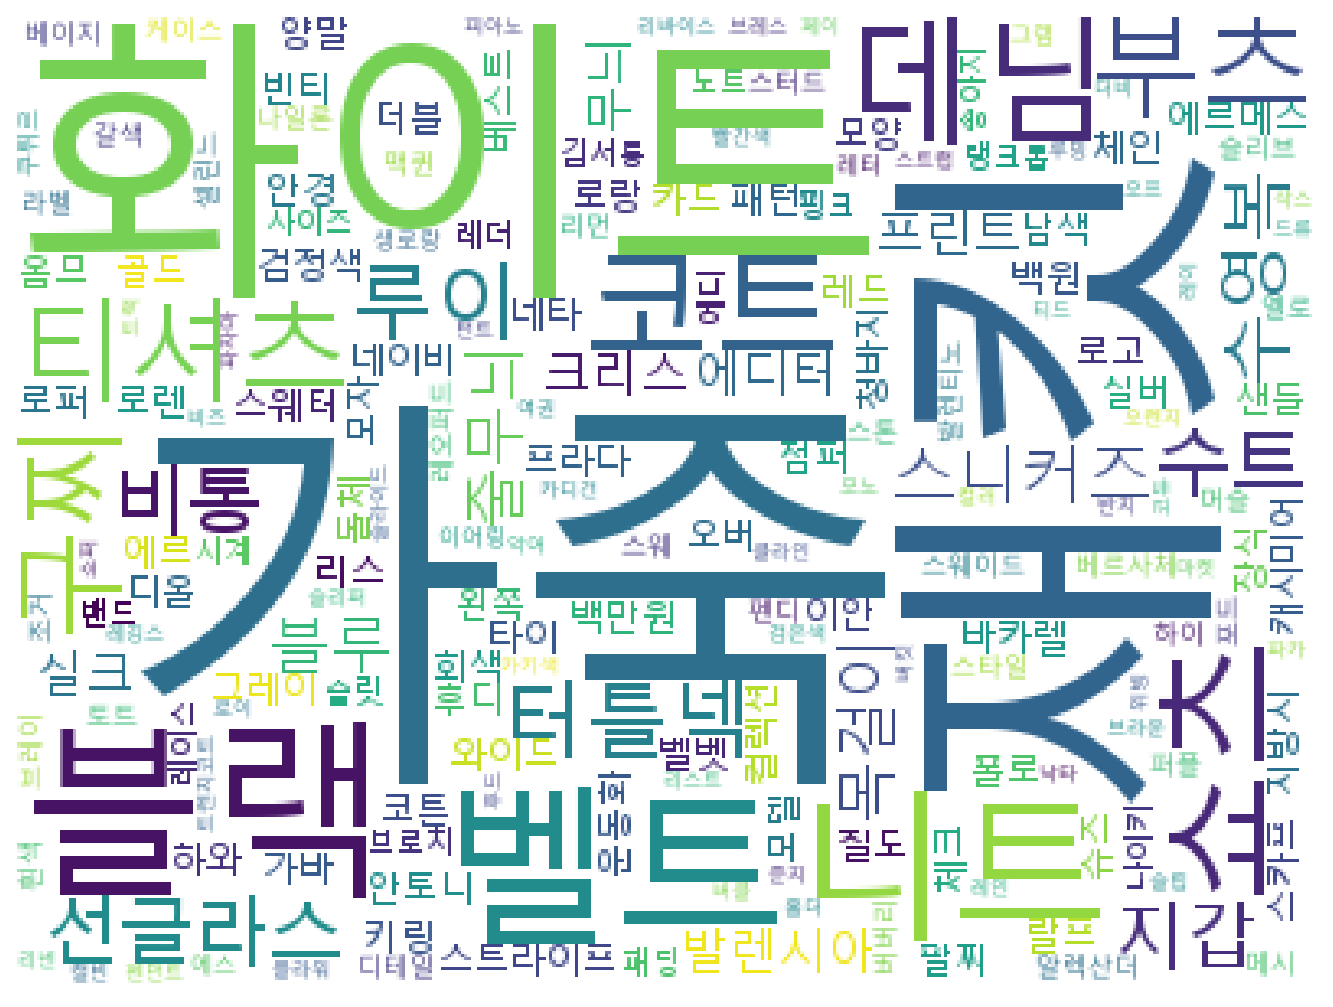

In [92]:
# 7월 8월
wc=WordCloud(font_path='c://Windows//Fonts/malgun.ttf',background_color='white',width=400,height=300)
cloud=wc.generate_from_frequencies(dict(word_count_3))
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

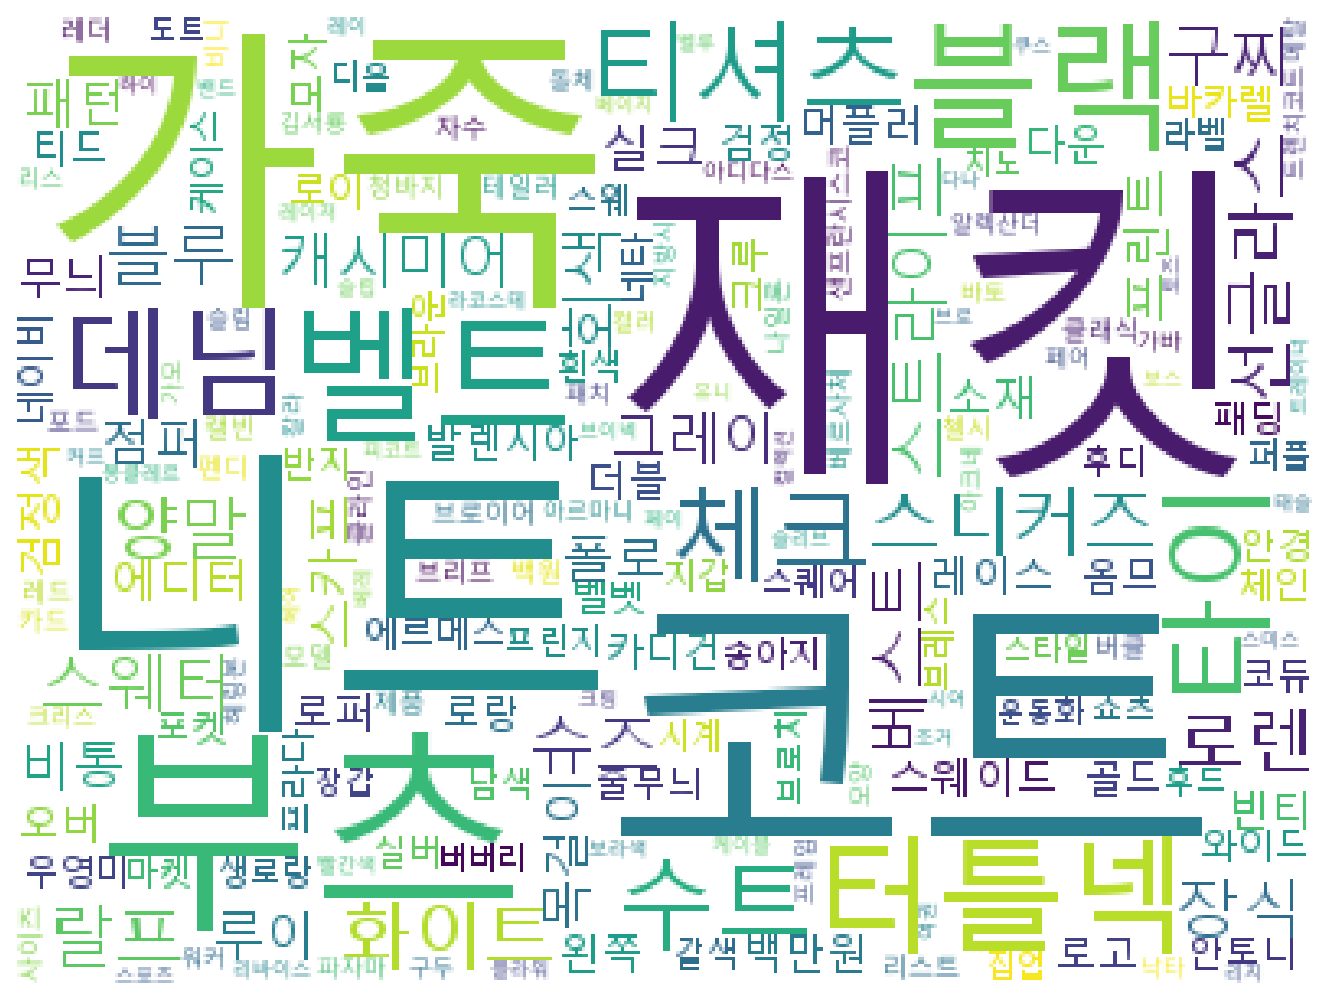

In [128]:
# 9월 10월
wc=WordCloud(font_path='c://Windows//Fonts/malgun.ttf',background_color='white',width=400,height=300)
cloud=wc.generate_from_frequencies(dict(word_count_4))
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [94]:
# 데이터 베이스 코드 추가

In [95]:
%%writefile gq/gq/mongodb.py
import pymongo

client = pymongo.MongoClient('mongodb://13.125.190.48:27017')
db = client.gq
collection = db.items

Writing gq/gq/mongodb.py


In [115]:
data = {"title":"gq"}
collection.insert(data)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


ObjectId('5f23caf1d26645070f605129')

In [96]:
# 파이프라인 코드 추가

In [122]:
%%writefile gq/gq/pipelines.py
from mongodb import collection

class GqPipeline(object):

    def process_item(self, item, spider):

        # mongodb에 저장
        columns = ["title", "category", "date", "contents", "link"]
        data = {column: item[column] for column in columns}
        collection.insert(data)

        return item

Overwriting gq/gq/pipelines.py


In [123]:
# 파이프 라인 설정

In [124]:
!echo "ITEM_PIPELINES = {" >> gq/gq/settings.py

In [125]:
!echo "   'gq.pipelines.GqPipeline': 300," >> gq/gq/settings.py

In [126]:
!echo "}" >> gq/gq/settings.py

In [127]:
!tail -n 3 gq/gq/settings.py

"ITEM_PIPELINES = {" 
"   'gq.pipelines.GqPipeline': 300," 
"}" 


In [103]:
# 코드의 실행

In [107]:
%%writefile run.sh
cd gq
scrapy crawl Gq -o gq_c.csv

Overwriting run.sh


In [108]:
import pymongo

client = pymongo.MongoClient('mongodb://13.125.190.48:27017')
db = client.gq
collection = db.items

In [109]:
datas = collection.find({}, {"_id": False})

In [110]:
pd.DataFrame(datas).tail(2)

""
